In [1]:
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt

def bar_graph(df: pd.DataFrame):

    #df.groupby(["Topic", "Sentiment"]).count().unstack('Sentiment').plot.bar()
    df_count = df
    df_count.loc[df_count["Topic"] == 'O', "Topic"] = "Omicron"
    df_count.loc[df_count["Topic"] == 'V', "Topic"] = "Vaccine"
    df_count.loc[df_count["Topic"] == 'N', "Topic"] = "News"
    df_count.loc[df_count["Topic"] == 'I', "Topic"] = "Influence"
    df_count.loc[df_count["Topic"] == 'P', "Topic"] = "Opinion"
    df_count.loc[df_count["Sentiment"] == 'P', "Sentiment"] = "Positive"
    df_count.loc[df_count["Sentiment"] == 'N', "Sentiment"] = "Negative"
    df_count.loc[df_count["Sentiment"] == 'E', "Sentiment"] = "Neutral"

    df_count = df_count.groupby(["Topic", "Sentiment"])["Twitts"].count()
    print(df_count.head(5))
    df_count.unstack("Sentiment").plot.bar()
    plt.title("Count of tweets for Topics and Sentiments")
    plt.ylabel("Count")
    plt.xlabel("Topics")
    plt.xticks(rotation = 0)
    plt.show()
    



In [2]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(df: pd.DataFrame):

    comment_words = ''
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("@")
    stopwords.add("people")
    stopwords.add("will")
    stopwords.add("now")
    stopwords.add("new")
    # iterate through the csv file
    for val in df.Twitts:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

Topic      Sentiment
Influence  Negative      66
           Neutral       40
           Positive      53
News       Negative      31
           Neutral      113
Name: Twitts, dtype: int64


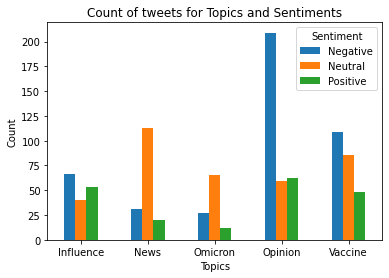

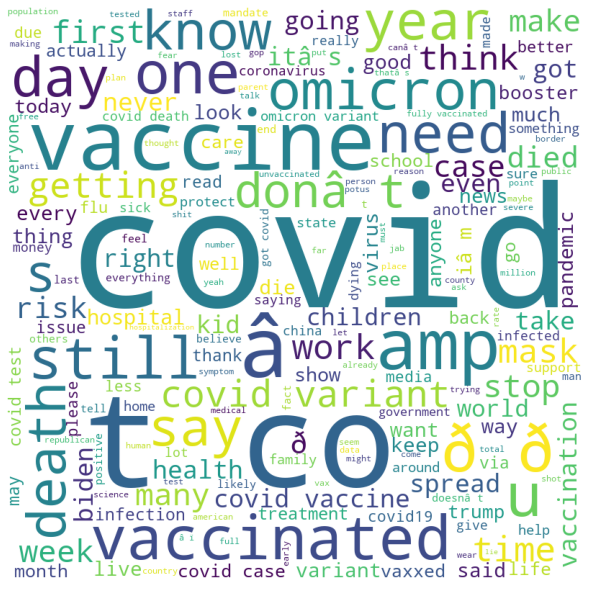

In [3]:
if __name__ =="__main__":
    df = pd.read_csv(r'C:\Users\annas\OneDrive - McGill University\Fall 2021\COMP 598\COMP598-Project\data\new_clear_twitts_anno_1-1000.tsv',sep='\t', encoding= 'unicode_escape')
    bar_graph(df)
    word_cloud(df)